In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import json
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pprint import pprint

In [2]:
df = pd.read_hdf("store.h5")

df["time_of_day"] = df['time'].apply(lambda x: datetime.fromtimestamp(x).time())
df["day_of_month"] = df['time'].apply(lambda x: int((datetime.fromtimestamp(x)).strftime("%d")))
df["date"] = df['time'].apply(lambda x: (datetime.fromtimestamp(x)).strftime("%Y-%m-%d"))
df['returns'] = df["close"] - df["close"].shift(1)
df['abs_ret'] = abs(df['returns'])
# df["day_of_month"].astype(int,inplace = True)
df["range"] = df["high"] - df["low"]

In [3]:
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,date,returns,abs_ret,range
date_time,,,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2017-07-31,NaN,NaN,2.00
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,2017-07-31,0.12,0.12,1.57
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,2017-07-31,0.37,0.37,0.97
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,2017-07-31,-0.36,0.36,0.90
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2017-07-31,1.93,1.93,2.44


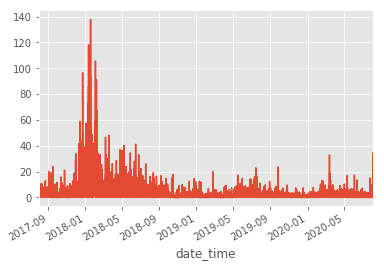

In [4]:
df['abs_ret'].plot()

In [9]:
# temp.quantile(0.75)

vol_threshold = 50000

df["is_range"] = df["volume"] < vol_threshold
df.head()

,time,low,high,open,close,volume,day,time_of_day,day_of_month,date,returns,abs_ret,range,is_range
date_time,,,,,,,,,,,,,,
2017-07-31 12:00:00,1501466400,194.00,196.00,194.33,195.28,2841.638143,0,12:00:00,31,2017-07-31,NaN,NaN,2.00,True
2017-07-31 13:00:00,1501470000,194.92,196.49,195.29,195.40,2157.584857,0,13:00:00,31,2017-07-31,0.12,0.12,1.57,True
2017-07-31 14:00:00,1501473600,195.00,195.97,195.39,195.77,1311.341183,0,14:00:00,31,2017-07-31,0.37,0.37,0.97,True
2017-07-31 15:00:00,1501477200,195.00,195.90,195.77,195.41,1739.863734,0,15:00:00,31,2017-07-31,-0.36,0.36,0.90,True
2017-07-31 16:00:00,1501480800,195.06,197.50,195.43,197.34,2879.591574,0,16:00:00,31,2017-07-31,1.93,1.93,2.44,True


In [32]:
trend_days = np.argwhere(df["is_range"].values==False).flatten()
start = 0
end = 0
range_section = []
for elem in trend_days:
    end = elem
    if np.abs(start - end) == 0 :
        start = end + 1
        continue
    else:
        range_section.append(df.iloc[start:end])
        start = end + 1


In [34]:
len(range_section)

123

In [45]:
vol_section  = np.zeros(len(range_section))
for i in range(len(vol_section)):
    vol_section[i] = range_section[i]["close"].std()
print(f"The average std for all range sections {pd.DataFrame(vol_section).mean()[0]}")

The average std for all range sections 16.126381667472764


In [44]:
pd.DataFrame(vol_section).mean()[0]

16.126381667472764

In [49]:
df[df["is_range"]==True][["range","volume"]].mean()

range        4.548437
volume    5695.183314
dtype: float64

## Bigest moves

In [56]:
# df.resample("1D").mean().sort_values(by = "range",ascending=False)['range']

In [63]:
df_day = df.resample("1D").mean()
df_day_2020 = df_day[df_day.index > datetime(2020,1,1)]
df_day_2020.head()

,time,low,high,open,close,volume,day,day_of_month,returns,abs_ret,range,is_range
date_time,,,,,,,,,,,,
2020-01-02,1.577925e+09,129.786667,130.625833,130.304583,130.240833,1780.937208,3.0,2.0,-0.073750,0.408750,0.839167,1.0
2020-01-03,1.578011e+09,127.890417,129.062083,128.446667,128.561667,3174.818824,4.0,3.0,0.109583,0.624583,1.171667,1.0
2020-01-04,1.578098e+09,132.605833,133.806250,133.244167,133.273333,2555.453525,5.0,4.0,0.022917,0.617083,1.200417,1.0
2020-01-05,1.578184e+09,134.206250,135.097917,134.530833,134.657083,1354.184907,6.0,5.0,0.135417,0.411250,0.891667,1.0
2020-01-06,1.578271e+09,137.375000,138.752917,137.939167,138.209583,2999.292180,0.0,6.0,0.266250,0.686250,1.377917,1.0


In [64]:
df_day_2020.sort_values(by = "range",ascending=False)['range']

date_time
2020-03-13    13.134583
2020-08-02    12.952917
2020-08-04     8.125833
2020-03-12     7.845417
2020-08-03     7.157083
2020-02-17     6.997917
2020-02-27     6.396250
2020-02-13     6.267500
2020-03-09     6.168333
2020-07-28     6.036250
2020-03-14     6.000417
2020-02-20     5.625000
2020-03-21     5.488333
2020-07-26     5.385000
2020-02-16     5.142083
2020-02-26     5.052083
2020-02-19     5.051250
2020-02-18     5.045833
2020-07-27     5.038750
2020-03-20     4.779167
2020-02-28     4.720833
2020-02-21     4.709583
2020-02-14     4.706667
2020-07-31     4.501250
2020-04-30     4.477917
2020-03-16     4.462083
2020-03-10     4.216250
2020-08-01     4.112500
2020-02-29     4.054167
2020-03-17     4.031667
                ...    
2020-07-21     1.354167
2020-04-05     1.334400
2020-07-22     1.310833
2020-07-13     1.297083
2020-01-23     1.292917
2020-07-01     1.288750
2020-01-07     1.271667
2020-06-14     1.262083
2020-01-14     1.260000
2020-07-17     1.257083
2020-0